# Integración por Monte Carlo
## Óscar Gómez y Alejandro Cabana
### MUCD 2020-21

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.stats import norm
from scipy.stats import cauchy
from scipy.stats import t
from scipy.stats import expon
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Ejemplo 1

In [2]:
def f(x):
    return np.abs(np.sin(2*np.pi*x)**5-2*np.cos(3*np.cos(x/np.pi)**2)**3)

In [3]:
def montecarlo(f,a,b,nsample,N=1):
    x = np.random.rand(N,nsample)*(b-a)+a
    x = np.sort(x)
    fx = f(x)
    fmax = np.max(fx)
    y = np.random.rand(N,nsample)*fmax

    accepted = y <= fx

    IMC = np.sum(accepted,1)/nsample * (b-a)*fmax
    
    return IMC, x,fx,y,accepted

Integración: 12.254596612458393 Estimación: 12.241678093061875


<ipython-input-4-ff0102cf8bfc>:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = integrate.quad(f,0,10)


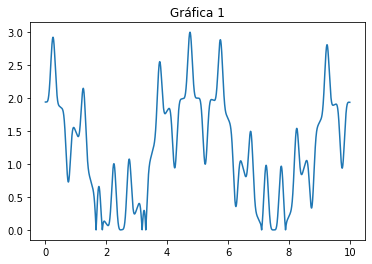

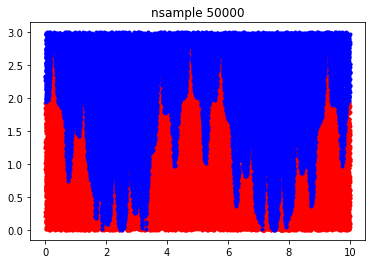

/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


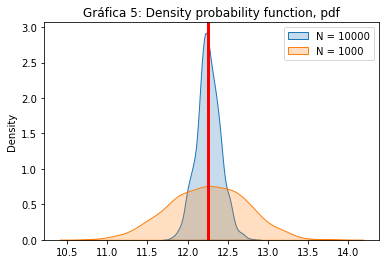

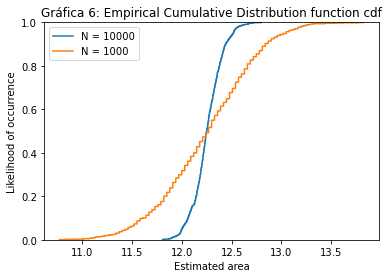

In [4]:
a = 0
b = 10
nsample = 50000

IMC,x,fx,y,accepted = montecarlo(f,a,b,nsample)
IMC,x,fx,y,accepted = (IMC[0],x[0],fx[0],y[0],accepted[0])
I = integrate.quad(f,0,10)

print('Integración:',I[0],'Estimación:',IMC)


plt.plot(x,fx)
plt.title("Gráfica 1")
plt.show()
plt.plot(x[accepted],y[accepted],'.r')
plt.plot(x[~accepted],y[~accepted],'.b')
plt.title(f"nsample {nsample}")
plt.show()


nsample = 10000
IMC1 = montecarlo(f,a,b,nsample,1000)[0]
sns.distplot(IMC1, hist=False, kde=True, label=f"N = {nsample}", kde_kws = {'shade': True})

nsample = 1000
IMC2 = montecarlo(f,a,b,nsample,1000)[0]
sns.distplot(IMC2, hist=False, kde=True, label=f"N = {nsample}", kde_kws = {'shade': True})
plt.legend()
plt.title("Gráfica 5: Density probability function, pdf")

plt.axvline(I[0],0,3,color='red',linewidth=3)
plt.show()

sns.ecdfplot(IMC1, label=f"N = 10000")
sns.ecdfplot(IMC2, label=f"N = 1000")
plt.title("Gráfica 6: Empirical Cumulative Distribution function cdf")
plt.xlabel("Estimated area")
plt.ylabel("Likelihood of occurrence")
plt.legend()

plt.show()

del IMC, x, fx, y, accepted, IMC2, IMC1

## Ejemplo 2

In [5]:
def g(x):
    return np.sqrt(1-x**2)

In [6]:
def montecarlo_media(g,a,b,nsample,N=1):
    x = np.random.rand(N,nsample)*(b-a)+a
    gx= g(x)
    IMC = np.mean(gx,1)*(b-a)
    return IMC

/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/oscar/anaconda3/envs/MUCD-CN/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


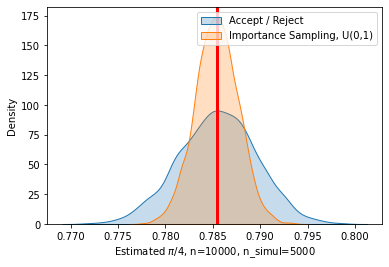

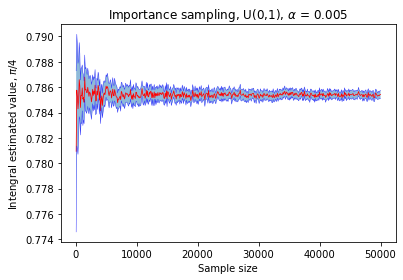

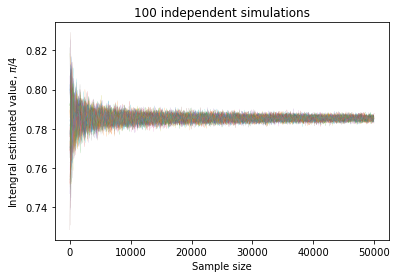

In [7]:
a = 0
b = 1

nsample = 10000
N = 5000

IMC_media = montecarlo_media(g,a,b,nsample,N)
IMC = montecarlo(g,a,b,nsample,N)[0]

sns.distplot(IMC, hist=False, kde=True, label=f"Accept / Reject", kde_kws = {'shade': True})

sns.distplot(IMC_media, hist=False, label=f"Importance Sampling, U(0,1)", kde=True, kde_kws = {'shade': True})

plt.xlabel("Estimated $\pi$/4, n=10000, n_simul=5000")
plt.legend()

plt.axvline(np.pi/4,0,3,color='red',linewidth=3)
plt.show()

simulations = 100

data = np.concatenate([montecarlo_media(g,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.5)
plt.plot(df2.index, df2.value, 'r', linewidth=0.75)
plt.plot(df2.index, df2.upper, 'b', linewidth=0.5, alpha=0.75)
plt.plot(df2.index, df2.lower, 'b', linewidth=0.5, alpha=0.75)
plt.title(r"Importance sampling, U(0,1), $\alpha$ = 0.005")
plt.xlabel("Sample size")
plt.ylabel("Intengral estimated value, $\pi$/4")
plt.show()

for i in range(100):
    plt.plot(df.value.iloc[i::simulations], linewidth=0.1)

plt.title("100 independent simulations")
plt.ylabel("Intengral estimated value, $\pi$/4")
plt.xlabel("Sample size")
plt.show()

del IMC_media, IMC, data, df, df2

## Ejemplo 3

In [8]:
def h(x):
    return np.abs(np.cos(50*x) + np.sin(20*x))

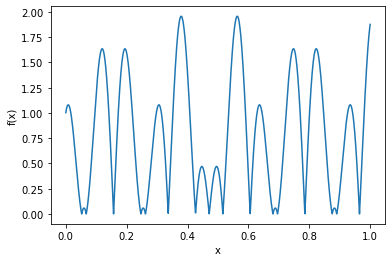

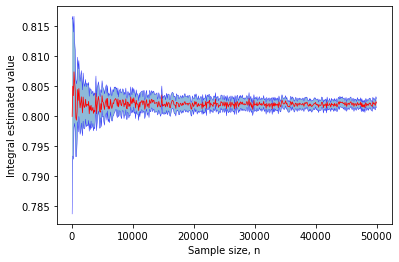

In [9]:
a = 0
b = 1

x = np.random.rand(10000)*(b-a)+a
x = np.sort(x)
hx = h(x)
plt.plot(x,hx)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

simulations = 100
data = np.concatenate([montecarlo_media(h,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.5)
plt.plot(df2.index, df2.value, 'r', linewidth=0.75)
plt.plot(df2.index,## Ejemplo  df2.upper, 'b', linewidth=0.5, alpha=0.75)
plt.plot(df2.index, df2.lower, 'b', linewidth=0.5, alpha=0.75)
plt.xlabel("Sample size, n")
plt.ylabel("Integral estimated value")
plt.show()

del x, hx, data, df, df2

## Ejemplo 4

In [10]:
def g(x):
    return np.exp(-2*np.abs(x-5))

In [11]:
def montecarlo_importancia(f,h,a,b,nsample,N):
    x = f((N,nsample))
    hx = h(x)
    return np.mean(hx,1)

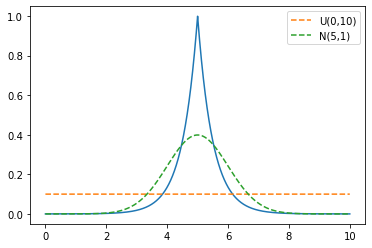

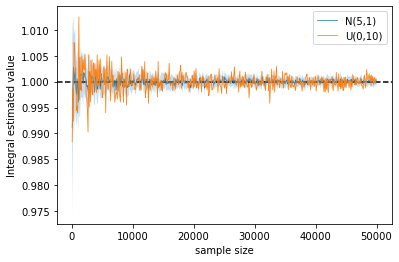

In [13]:
a = 0
b = 10

nx = 10000
x = np.linspace(a, b, nx)

y_norm = norm.pdf(x,5,1)
y_unif = np.full_like(x,1/(b-a))
y_g = g(x)

plt.plot(x, y_g)
plt.plot(x, y_unif, '--', label="U(0,10)")
plt.plot(x, y_norm, '--', label="N(5,1)")
plt.legend()
plt.show()


simulations = 100
f_norm = lambda size: np.random.normal(5,1,size)
h_norm = lambda x: g(x)/norm.pdf(x,5,1)
data = np.concatenate([montecarlo_importancia(f_norm,h_norm,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.axhline(1,ls='--',color='black')

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.25)
plt.plot(df2.index, df2.value, linewidth=0.75, label="N(5,1)")


f_unif = lambda size: np.random.random_sample(size)*(b-a)+a
h_unif = lambda x : g(x)*(b-a)
data_u = np.concatenate([montecarlo_importancia(f_unif,h_unif,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df3 = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data_u})

df4 = df3.groupby("samples").mean()
df4["dif"] = df3.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df4["upper"] = df4["value"] + df4["dif"]
df4["lower"] = df4["value"] - df4["dif"]

#plt.fill_between(x = df4.index,y1 = df4.lower, y2 = df4.upper, alpha=0.25)
plt.plot(df4.index, df4.value, linewidth=0.75, label="U(0,10)")
plt.legend()
plt.xlabel("sample size")
plt.ylabel("Integral estimated value")
plt.show()

del x, y_norm, y_unif, y_g, data, df, df2, df3, df4, data_u

## Ejemplo 5

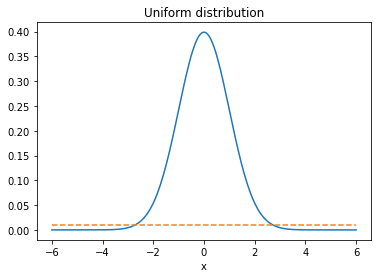

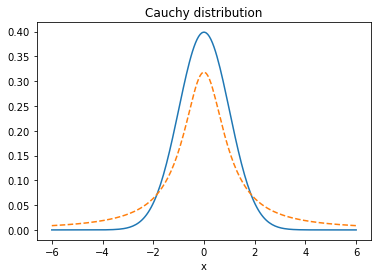

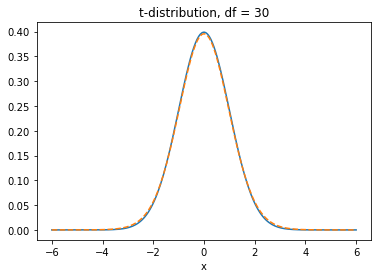

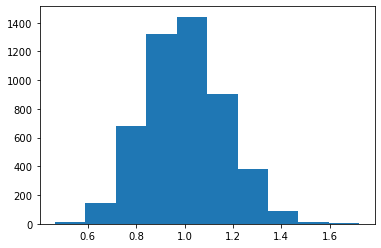

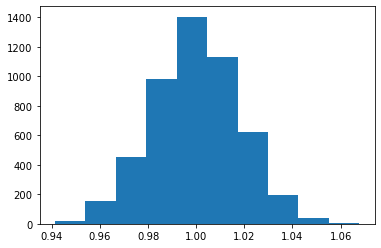

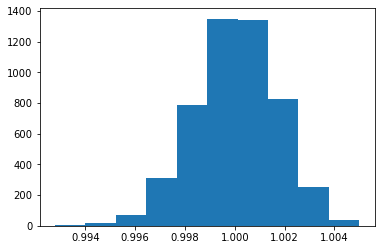

In [15]:
x = np.linspace(-6,6, 200)
nx = norm.pdf(x)
plt.plot(x, nx)
plt.plot(x, [1/100]*200, "--")
plt.title("Uniform distribution")
plt.xlabel("x")
plt.show()

plt.plot(x, nx)
plt.plot(x, cauchy.pdf(x), "--")
plt.title("Cauchy distribution")
plt.xlabel("x")
plt.show()

plt.plot(x, nx)
plt.plot(x, t.pdf(x,30), "--")
plt.title("t-distribution, df = 30")
plt.xlabel("x")
plt.show()

nsample = 1000
simulaciones = 5000

IMC = montecarlo_media(norm.pdf, -50, 50, nsample, simulaciones)
plt.hist(IMC)
plt.show()

IMCcauchy = montecarlo_importancia(np.random.standard_cauchy, lambda x: norm.pdf(x)/cauchy.pdf(x), -50, 50, nsample, simulaciones)
plt.hist(IMCcauchy)
plt.show()

IMCt = montecarlo_importancia(lambda x: np.random.standard_t(30,x), lambda x: norm.pdf(x)/t.pdf(x,30), -50, 50, nsample, simulaciones)
plt.hist(IMCt)
plt.show()

del x, nx, IMC, IMCcauchy, IMCt

## Ejemplo 6

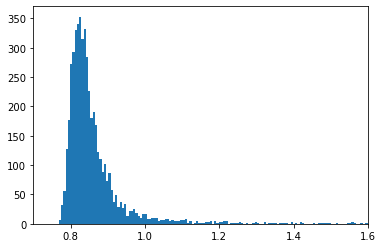

numero de simulaciones cuyo estimador excede 1.5: 73
[2.00455802 2.01984148 1.55756487 6.81503179 2.05654404 1.55599254
 1.56136603 1.81683922 1.61973028 1.72888091 1.5927934  1.60002309
 1.91196039 1.93577611 1.89089351 2.35932306 1.87065314 1.86886774
 3.04311273 1.66559591 1.87681476 2.20539562 2.16220707 1.91052545
 1.7766893  1.54430861 2.85772407 1.71882002 3.62735716 1.74955951
 3.12679161 2.18033369 2.30309425 2.87842087 2.22310804 1.59113284
 1.65758224 2.03960956 4.02048615 4.09532486 3.4202232  2.08851128
 2.04020291 3.19060682 1.58187224 1.73590007 2.27450777 1.6473665
 1.73510419 5.37687293 4.44076583 2.01195069 4.37195372 4.27368937
 1.8107146  1.84565699 1.94138167 2.47078441 1.90137046 1.55452582
 1.76683136 2.10052448 1.79702849 2.07260847 1.55853282 2.51139272
 1.67393075 1.51721176 1.5138986  1.8267419  1.62571925 1.75525739
 2.06943593]


In [35]:
nsample = 1000
simulaciones = 5000
IMC = montecarlo_importancia(lambda x: np.random.normal(0,1,x), lambda x: cauchy.pdf(x)/norm.pdf(x), -50, 50, nsample, simulaciones)
plt.hist(IMC, bins=1000)
plt.xlim([0.7,1.6])
plt.show()

print('numero de simulaciones cuyo estimador excede 1.5:', len(IMC[IMC>1.5]))
print(IMC[IMC>1.5])

del IMC

## Ejemplo 7

In [63]:
def f(x):
    a = 1/(2*np.sqrt(np.pi)) * np.exp(-x**2/2)
    a[np.where(x < 4.5)] = 0
    return a

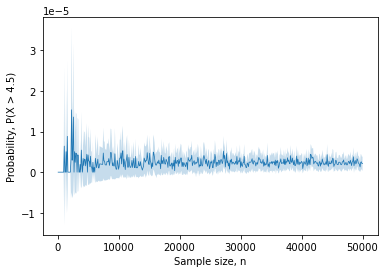

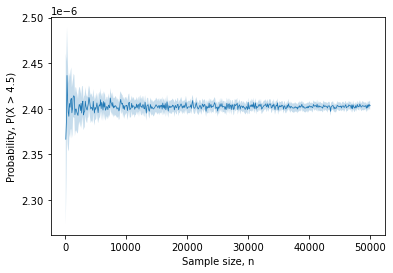

In [66]:
simulations = 100
data = np.concatenate([montecarlo_importancia(lambda x: np.random.normal(0,1,x), lambda x: f(x)/norm.pdf(x), -10000, 10000, nsample, simulations)for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.25)
plt.plot(df2.index, df2.value, linewidth=0.75)
plt.xlabel("Sample size, n")
plt.ylabel("Probability, P(X > 4.5)")
plt.show()

simulations = 100
data = np.concatenate([montecarlo_importancia(lambda x: np.random.exponential(1,x)+4.5, lambda x: f(x)/expon.pdf(x-4.5), -np.inf, np.inf, nsample, simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]


plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.25)
plt.plot(df2.index, df2.value, linewidth=0.75)
plt.xlabel("Sample size, n")
plt.ylabel("Probability, P(X > 4.5)")
plt.show()




del df, df2, data

## Ejemplo 8

In [56]:
def g(x):
    return np.exp(-np.abs(x))/2

def h(x):
    return g(x)/norm.pdf(x,0,2)

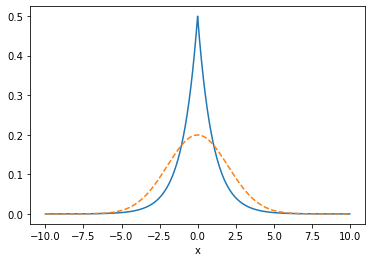

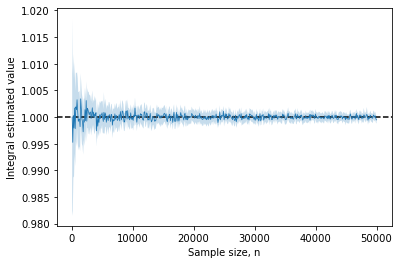

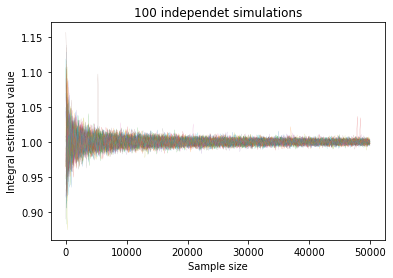

In [61]:
a = -10
b = 10

nx = 10000
x = np.linspace(a, b, nx)

y_norm = norm.pdf(x,0,2)
y_g = g(x)

plt.plot(x, y_g)
plt.plot(x, y_norm, '--')
plt.xlabel("x")
plt.show()


simulations = 100
f_norm = lambda size: np.random.normal(0,2,size)
data = np.concatenate([montecarlo_importancia(f_norm,h,a,b,nsample,simulations) for nsample in np.arange(100, 50100, 100)])

df = pd.DataFrame(data={'samples':np.repeat(np.arange(100, 50100, 100), simulations), 'value':data})

df2 = df.groupby("samples").mean()
df2["dif"] = df.groupby("samples").std()*norm.interval(0.9975)[1]/np.sqrt(simulations)
df2["upper"] = df2["value"] + df2["dif"]
df2["lower"] = df2["value"] - df2["dif"]

plt.axhline(1,ls='--',color='black')

plt.fill_between(x = df2.index,y1 = df2.lower, y2 = df2.upper, alpha=0.25)
plt.plot(df2.index, df2.value, linewidth=0.75)
plt.xlabel("Sample size, n")
plt.ylabel("Integral estimated value")
plt.show()

for i in range(100):
    plt.plot(df.value.iloc[i::simulations], linewidth=0.1)
    
plt.xlabel("Sample size")
plt.ylabel("Integral estimated value")
plt.title("100 independet simulations")
plt.show()

del x, y_norm, y_g, data, df, df2